In [ ]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import imblearn as ib
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
import folium
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('content/')

Drive already mounted at content/; to attempt to forcibly remount, call drive.mount("content/", force_remount=True).


In [ ]:
city_data = pd.read_csv('/content/content/MyDrive/Capstone_Project/Datasets/archive/city_day.csv', encoding='latin-1')

In [ ]:
city_data.head()

,City,Date,PM2.5,PM10,NO,N2O,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,01/01/15,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,02/01/15,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,03/01/15,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,04/01/15,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,05/01/15,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
city_data.tail()

,City,Date,PM2.5,PM10,NO,N2O,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
29526,Visakhapatnam,27/06/20,15.02,50.94,7.68,25.06,19.54,12.47,0.47,8.55,23.30,2.24,12.07,0.73,41.0,Good
29527,Visakhapatnam,28/06/20,24.38,74.09,3.42,26.06,16.53,11.99,0.52,12.72,30.14,0.74,2.21,0.38,70.0,Satisfactory
29528,Visakhapatnam,29/06/20,22.91,65.73,3.45,29.53,18.33,10.71,0.48,8.42,30.96,0.01,0.01,0.00,68.0,Satisfactory
29529,Visakhapatnam,30/06/20,16.64,49.97,4.05,29.26,18.80,10.03,0.52,9.84,28.30,0.00,0.00,0.00,54.0,Satisfactory
29530,Visakhapatnam,01/07/20,15.00,66.00,0.40,26.85,14.05,5.20,0.59,2.10,17.05,NaN,NaN,NaN,50.0,Good


In [ ]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   City        29531 non-null  object 
 1   Date        29531 non-null  object 
 2   PM2.5       24933 non-null  float64
 3   PM10        18391 non-null  float64
 4   NO          25949 non-null  float64
 5   N2O         25946 non-null  float64
 6   NOx         25346 non-null  float64
 7   NH3         19203 non-null  float64
 8   CO          27472 non-null  float64
 9   SO2         25677 non-null  float64
 10  O3          25509 non-null  float64
 11  Benzene     23908 non-null  float64
 12  Toluene     21490 non-null  float64
 13  Xylene      11422 non-null  float64
 14  AQI         24850 non-null  float64
 15  AQI_Bucket  24850 non-null  object 
dtypes: float64(13), object(3)
memory usage: 3.6+ MB


In [ ]:
#converting column Date into Date format
city_data['Date']=pd.to_datetime(city_data['Date'])

In [ ]:
city_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   City        29531 non-null  object        
 1   Date        29531 non-null  datetime64[ns]
 2   PM2.5       24933 non-null  float64       
 3   PM10        18391 non-null  float64       
 4   NO          25949 non-null  float64       
 5   N2O         25946 non-null  float64       
 6   NOx         25346 non-null  float64       
 7   NH3         19203 non-null  float64       
 8   CO          27472 non-null  float64       
 9   SO2         25677 non-null  float64       
 10  O3          25509 non-null  float64       
 11  Benzene     23908 non-null  float64       
 12  Toluene     21490 non-null  float64       
 13  Xylene      11422 non-null  float64       
 14  AQI         24850 non-null  float64       
 15  AQI_Bucket  24850 non-null  object        
dtypes: datetime64[ns](1), 

In [ ]:
df1 = city_data.drop(['PM2.5','PM10','NOx','NH3','SO2','O3','Benzene','Toluene','Xylene','AQI','AQI_Bucket'],axis=1)

In [ ]:
df1['NO']=df1['NO'].fillna((df1['NO'].median()))
df1['N2O']=df1['N2O'].fillna((df1['N2O'].median()))
df1['CO']=df1['CO'].fillna((df1['CO'].median()))

In [ ]:
# Printing the number of N/A values in each columns of station_hour dataset
print(df1.isna().sum())

City    0
Date    0
NO      0
N2O     0
CO      0
dtype: int64


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29531 entries, 0 to 29530
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   City    29531 non-null  object        
 1   Date    29531 non-null  datetime64[ns]
 2   NO      29531 non-null  float64       
 3   N2O     29531 non-null  float64       
 4   CO      29531 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 1.1+ MB


In [ ]:
city_N2O = df1.pivot_table(values='N2O', index=['Date'], columns='City')
city_N2O = city_N2O.add_suffix('_N2O')
city_N2O = city_N2O.resample(rule='MS').mean()
city_N2O.head()

City,Ahmedabad_N2O,Aizawl_N2O,Amaravati_N2O,Amritsar_N2O,Bengaluru_N2O,Bhopal_N2O,Brajrajnagar_N2O,Chandigarh_N2O,Chennai_N2O,Coimbatore_N2O,...,Jorapokhar_N2O,Kochi_N2O,Kolkata_N2O,Lucknow_N2O,Mumbai_N2O,Patna_N2O,Shillong_N2O,Talcher_N2O,Thiruvananthapuram_N2O,Visakhapatnam_N2O
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,23.601935,NaN,NaN,NaN,15.585806,NaN,NaN,NaN,25.773871,NaN,...,NaN,NaN,NaN,16.052903,21.69,21.400000,NaN,NaN,NaN,NaN
2015-02-01,27.920000,NaN,NaN,NaN,21.107857,NaN,NaN,NaN,15.208929,NaN,...,NaN,NaN,NaN,21.309286,21.69,20.294286,NaN,NaN,NaN,NaN
2015-03-01,26.264839,NaN,NaN,NaN,20.958387,NaN,NaN,NaN,32.312903,NaN,...,NaN,NaN,NaN,22.815484,21.69,21.864286,NaN,NaN,NaN,NaN
2015-04-01,20.661000,NaN,NaN,NaN,12.249667,NaN,NaN,NaN,27.268667,NaN,...,NaN,NaN,NaN,20.408667,21.69,19.391429,NaN,NaN,NaN,NaN
2015-05-01,19.456774,NaN,NaN,NaN,21.188387,NaN,NaN,NaN,20.155161,NaN,...,NaN,NaN,NaN,14.196774,21.69,20.084286,NaN,NaN,NaN,NaN


In [ ]:
city_NO = df1.pivot_table(values='NO', index=['Date'], columns='City')
city_NO = city_NO.add_suffix('_NO')
city_NO = city_NO.resample(rule='MS').mean()
city_NO.head()

City,Ahmedabad_NO,Aizawl_NO,Amaravati_NO,Amritsar_NO,Bengaluru_NO,Bhopal_NO,Brajrajnagar_NO,Chandigarh_NO,Chennai_NO,Coimbatore_NO,...,Jorapokhar_NO,Kochi_NO,Kolkata_NO,Lucknow_NO,Mumbai_NO,Patna_NO,Shillong_NO,Talcher_NO,Thiruvananthapuram_NO,Visakhapatnam_NO
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,10.713226,NaN,NaN,NaN,11.450000,NaN,NaN,NaN,23.198387,NaN,...,NaN,NaN,NaN,6.350645,9.89,47.781429,NaN,NaN,NaN,NaN
2015-02-01,22.957143,NaN,NaN,NaN,7.902500,NaN,NaN,NaN,11.519286,NaN,...,NaN,NaN,NaN,5.756071,9.89,32.610000,NaN,NaN,NaN,NaN
2015-03-01,15.398710,NaN,NaN,NaN,6.917742,NaN,NaN,NaN,19.287097,NaN,...,NaN,NaN,NaN,9.071290,9.89,30.405714,NaN,NaN,NaN,NaN
2015-04-01,9.870667,NaN,NaN,NaN,4.483000,NaN,NaN,NaN,19.446000,NaN,...,NaN,NaN,NaN,8.127333,9.89,30.042857,NaN,NaN,NaN,NaN
2015-05-01,11.037097,NaN,NaN,NaN,6.103226,NaN,NaN,NaN,11.798065,NaN,...,NaN,NaN,NaN,4.480968,9.89,32.390000,NaN,NaN,NaN,NaN


In [ ]:
city_CO = df1.pivot_table(values='CO', index=['Date'], columns='City')
city_CO = city_CO.add_suffix('_CO')
city_CO = city_CO.resample(rule='MS').mean()
city_CO.head()

City,Ahmedabad_CO,Aizawl_CO,Amaravati_CO,Amritsar_CO,Bengaluru_CO,Bhopal_CO,Brajrajnagar_CO,Chandigarh_CO,Chennai_CO,Coimbatore_CO,...,Jorapokhar_CO,Kochi_CO,Kolkata_CO,Lucknow_CO,Mumbai_CO,Patna_CO,Shillong_CO,Talcher_CO,Thiruvananthapuram_CO,Visakhapatnam_CO
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,10.132581,NaN,NaN,NaN,4.790323,NaN,NaN,NaN,1.912581,NaN,...,NaN,NaN,NaN,9.330000,0.0,1.641429,NaN,NaN,NaN,NaN
2015-02-01,21.671429,NaN,NaN,NaN,4.263929,NaN,NaN,NaN,3.028929,NaN,...,NaN,NaN,NaN,9.724643,0.0,1.764286,NaN,NaN,NaN,NaN
2015-03-01,15.108387,NaN,NaN,NaN,8.746129,NaN,NaN,NaN,1.802581,NaN,...,NaN,NaN,NaN,3.149677,0.0,1.464286,NaN,NaN,NaN,NaN
2015-04-01,9.570667,NaN,NaN,NaN,3.525000,NaN,NaN,NaN,4.430667,NaN,...,NaN,NaN,NaN,3.332000,0.0,1.614286,NaN,NaN,NaN,NaN
2015-05-01,10.746774,NaN,NaN,NaN,6.951290,NaN,NaN,NaN,2.628710,NaN,...,NaN,NaN,NaN,3.567097,0.0,1.530000,NaN,NaN,NaN,NaN


In [ ]:
#form a new column containing India's N2O for every month by taking the average of all cities for that month
city_N2O['India_N2O']=city_N2O.mean(axis=1)
city_N2O.head()

City,Ahmedabad_N2O,Aizawl_N2O,Amaravati_N2O,Amritsar_N2O,Bengaluru_N2O,Bhopal_N2O,Brajrajnagar_N2O,Chandigarh_N2O,Chennai_N2O,Coimbatore_N2O,...,Kochi_N2O,Kolkata_N2O,Lucknow_N2O,Mumbai_N2O,Patna_N2O,Shillong_N2O,Talcher_N2O,Thiruvananthapuram_N2O,Visakhapatnam_N2O,India_N2O
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,23.601935,NaN,NaN,NaN,15.585806,NaN,NaN,NaN,25.773871,NaN,...,NaN,NaN,16.052903,21.69,21.400000,NaN,NaN,NaN,NaN,21.154753
2015-02-01,27.920000,NaN,NaN,NaN,21.107857,NaN,NaN,NaN,15.208929,NaN,...,NaN,NaN,21.309286,21.69,20.294286,NaN,NaN,NaN,NaN,22.366104
2015-03-01,26.264839,NaN,NaN,NaN,20.958387,NaN,NaN,NaN,32.312903,NaN,...,NaN,NaN,22.815484,21.69,21.864286,NaN,NaN,NaN,NaN,23.774335
2015-04-01,20.661000,NaN,NaN,NaN,12.249667,NaN,NaN,NaN,27.268667,NaN,...,NaN,NaN,20.408667,21.69,19.391429,NaN,NaN,NaN,NaN,22.588492
2015-05-01,19.456774,NaN,NaN,NaN,21.188387,NaN,NaN,NaN,20.155161,NaN,...,NaN,NaN,14.196774,21.69,20.084286,NaN,NaN,NaN,NaN,22.729078


In [ ]:
#form a new column containing India's NO for every month by taking the average of all cities for that month
city_NO['India_NO']=city_NO.mean(axis=1)
city_NO.head()

City,Ahmedabad_NO,Aizawl_NO,Amaravati_NO,Amritsar_NO,Bengaluru_NO,Bhopal_NO,Brajrajnagar_NO,Chandigarh_NO,Chennai_NO,Coimbatore_NO,...,Kochi_NO,Kolkata_NO,Lucknow_NO,Mumbai_NO,Patna_NO,Shillong_NO,Talcher_NO,Thiruvananthapuram_NO,Visakhapatnam_NO,India_NO
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,10.713226,NaN,NaN,NaN,11.450000,NaN,NaN,NaN,23.198387,NaN,...,NaN,NaN,6.350645,9.89,47.781429,NaN,NaN,NaN,NaN,16.850344
2015-02-01,22.957143,NaN,NaN,NaN,7.902500,NaN,NaN,NaN,11.519286,NaN,...,NaN,NaN,5.756071,9.89,32.610000,NaN,NaN,NaN,NaN,15.784874
2015-03-01,15.398710,NaN,NaN,NaN,6.917742,NaN,NaN,NaN,19.287097,NaN,...,NaN,NaN,9.071290,9.89,30.405714,NaN,NaN,NaN,NaN,15.024385
2015-04-01,9.870667,NaN,NaN,NaN,4.483000,NaN,NaN,NaN,19.446000,NaN,...,NaN,NaN,8.127333,9.89,30.042857,NaN,NaN,NaN,NaN,15.043540
2015-05-01,11.037097,NaN,NaN,NaN,6.103226,NaN,NaN,NaN,11.798065,NaN,...,NaN,NaN,4.480968,9.89,32.390000,NaN,NaN,NaN,NaN,15.026810


In [ ]:
#form a new column containing India's CO for every month by taking the average of all cities for that month
city_CO['India_CO']=city_CO.mean(axis=1)
city_CO.head()

City,Ahmedabad_CO,Aizawl_CO,Amaravati_CO,Amritsar_CO,Bengaluru_CO,Bhopal_CO,Brajrajnagar_CO,Chandigarh_CO,Chennai_CO,Coimbatore_CO,...,Kochi_CO,Kolkata_CO,Lucknow_CO,Mumbai_CO,Patna_CO,Shillong_CO,Talcher_CO,Thiruvananthapuram_CO,Visakhapatnam_CO,India_CO
Date,,,,,,,,,,,,,,,,,,,,,
2015-01-01,10.132581,NaN,NaN,NaN,4.790323,NaN,NaN,NaN,1.912581,NaN,...,NaN,NaN,9.330000,0.0,1.641429,NaN,NaN,NaN,NaN,4.258634
2015-02-01,21.671429,NaN,NaN,NaN,4.263929,NaN,NaN,NaN,3.028929,NaN,...,NaN,NaN,9.724643,0.0,1.764286,NaN,NaN,NaN,NaN,5.831809
2015-03-01,15.108387,NaN,NaN,NaN,8.746129,NaN,NaN,NaN,1.802581,NaN,...,NaN,NaN,3.149677,0.0,1.464286,NaN,NaN,NaN,NaN,4.400534
2015-04-01,9.570667,NaN,NaN,NaN,3.525000,NaN,NaN,NaN,4.430667,NaN,...,NaN,NaN,3.332000,0.0,1.614286,NaN,NaN,NaN,NaN,3.712995
2015-05-01,10.746774,NaN,NaN,NaN,6.951290,NaN,NaN,NaN,2.628710,NaN,...,NaN,NaN,3.567097,0.0,1.530000,NaN,NaN,NaN,NaN,3.910717


In [ ]:
#installing pmdarima
!pip install pmdarima;
from pmdarima import auto_arima;

In [ ]:
auto_arima(y=city_N2O['India_N2O'],start_p=1,start_P=1,start_q=1,start_Q=1,seasonal=True,m=12, stepwise=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(2, 0, 0)   Log Likelihood                -176.578
Date:                Wed, 08 Nov 2023   AIC                            361.157
Time:                        06:29:44   BIC                            370.263
Sample:                    01-01-2015   HQIC                           364.782
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      4.8671      1.982      2.456      0.014       0.983       8.751
ar.L1          1.0673      0.127      8.380      0.000       0.818       1.317
ar.L2         -0.2530      0.124     -2.039      0.041      -0.496      -0.010
sigma2         7.7468      1.131      6.849      0.000       5.530       9.964
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 9.60
Prob(Q):                              0.90   Prob(JB):                         0.01
Heteroskedasticity (H):               1.12   Skew:                             0.64
Prob(H) (two-sided):                  0.78   Kurtosis:                         4.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#dividing into train and test:
train_data_N2O =city_N2O['India_N2O'][:'2018-12']
test_data_N2O =city_N2O['India_N2O'][:'2019-12']

from statsmodels.tsa.statespace.sarimax import SARIMAX

#Building the model:
model_N2O=SARIMAX(train_data_N2O,order=(0,1,2),seasonal_order=(1,0,1,12), trend='n')
results_N2O=model_N2O.fit()

#printing summry of model reults
results_N2O.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                            India_N2O   No. Observations:                   48
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -114.897
Date:                              Wed, 08 Nov 2023   AIC                            239.793
Time:                                      06:29:45   BIC                            249.044
Sample:                                  01-01-2015   HQIC                           243.275
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1          0.0931      0.165      0.564      0.573      -0.230       0.417
ma.L2          0.0076      0.170      0.045      0.964      -0.326       0.342
ar.S.L12       0.9989      1.151      0.868      0.385      -1.257       3.254
ma.S.L12      -0.9780     11.574     -0.084      0.933     -23.664      21.708
sigma2         6.7527     70.208      0.096      0.923    -130.852     144.357
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.49
Prob(Q):                              0.98   Prob(JB):                         0.01
Heteroskedasticity (H):               2.47   Skew:                             0.72
Prob(H) (two-sided):                  0.08   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

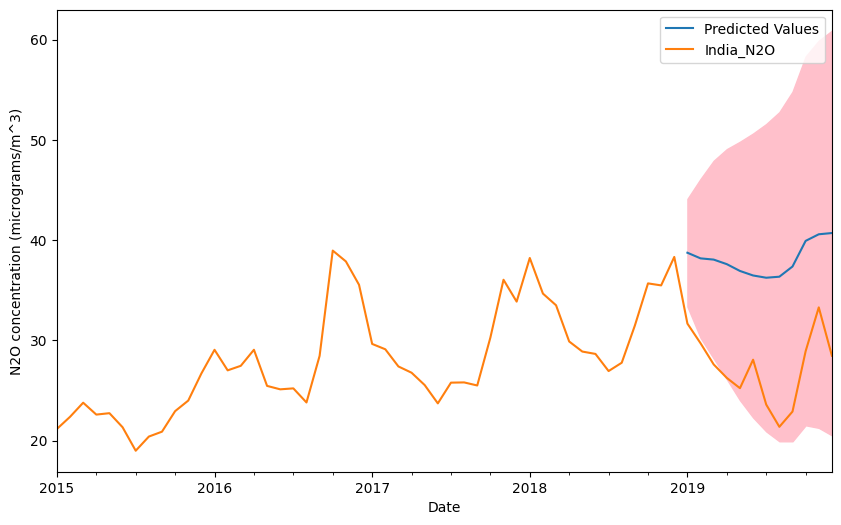

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

# predict the next 12 months values to compare with the test dataset
forecasts_N2O = results_N2O.get_forecast(steps=12, dynamic=True)

# find the confidence intervals
confidence_intervals_N2O = forecasts_N2O.conf_int()
lower_limits_N2O = confidence_intervals_N2O.loc[:,'lower India_N2O']
upper_limits_N2O = confidence_intervals_N2O.loc[:,'upper India_N2O']

# plot the forecasted mean data for the next 12 months and the confidence interval
forecasts_N2O.predicted_mean.plot(legend=True, ax=ax, label='Predicted Values')
plt.fill_between(confidence_intervals_N2O.index, lower_limits_N2O, upper_limits_N2O, color='pink')

# plotting the actual value from test data
test_data_N2O.plot(legend=True, ax=ax)

# Add SI unit and scale to the y-axis
ax.set_ylabel('N2O concentration (micrograms/m^3)')

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

test_N2O = city_N2O['India_N2O']['2019-01':'2019-12']
RMSE_N2O = np.sqrt(mean_squared_error(forecasts_N2O.predicted_mean,test_N2O))
print('N2O_RMSE = ',RMSE_N2O)

y_true_N2O = test_N2O
y_pre_N2O = forecasts_N2O.predicted_mean
mape_N2O = np.mean(np.abs((y_true_N2O - y_pre_N2O) / y_true_N2O)) * 100
print('N2O_MAPE = ', mape_N2O)

N2O_RMSE =  11.124115323315786
N2O_MAPE =  41.51520022779876


Text(0, 0.5, 'N2O concentration (micrograms/m^3)')

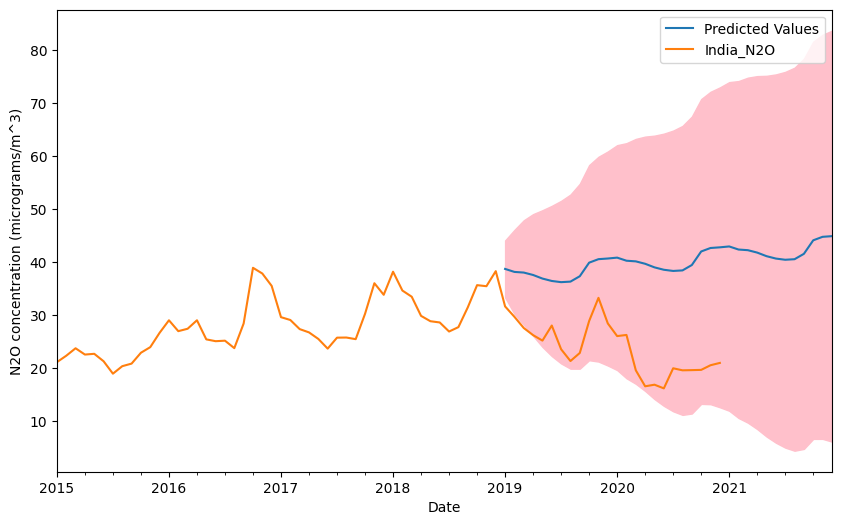

In [ ]:
fig, ax= plt.subplots(figsize=(10,6))

forecasts_N2O = results_N2O.get_forecast(steps=36, dynamic=True)

confidence_intervals_N2O = forecasts_N2O.conf_int()
lower_limits_N2O = confidence_intervals_N2O.loc[:,'lower India_N2O']
upper_limits_N2O = confidence_intervals_N2O.loc[:,'upper India_N2O']

#plot the forecasted data
forecasts_N2O.predicted_mean.plot(legend=True, ax=ax, label ='Predicted Values')

#plot the confidence interval as the shaded area
plt.fill_between(confidence_intervals_N2O.index, lower_limits_N2O, upper_limits_N2O, color='pink')

#Plot India's N2O Data
city_N2O['India_N2O'].plot(legend=True, ax=ax)

ax.set_ylabel('N2O concentration (micrograms/m^3)')

In [ ]:
auto_arima(y=city_NO['India_NO'],start_p=1,start_P=1,start_q=1,start_Q=1,seasonal=True,m=12, stepwise=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   72
Model:             SARIMAX(1, 0, 0)x(2, 0, 0, 12)   Log Likelihood                -159.404
Date:                            Wed, 08 Nov 2023   AIC                            328.808
Time:                                    06:30:21   BIC                            340.191
Sample:                                01-01-2015   HQIC                           333.340
                                     - 12-01-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.0645      0.844      2.445      0.014       0.410       3.719
ar.L1          0.5509      0.121      4.569      0.000       0.315       0.787
ar.S.L12       0.1752      0.103      1.697      0.090      -0.027       0.377
ar.S.L24       0.5437      0.073      7.460      0.000       0.401       0.687
sigma2         4.2274      0.596      7.094      0.000       3.059       5.395
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                11.15
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.19   Skew:                             0.57
Prob(H) (two-sided):                  0.67   Kurtosis:                         4.55
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#dividing into train and test:
train_data_NO =city_NO['India_NO'][:'2018-12']
test_data_NO =city_NO['India_NO'][:'2019-12']

from statsmodels.tsa.statespace.sarimax import SARIMAX

#Building the model:
model_NO=SARIMAX(train_data_NO,order=(0,1,2),seasonal_order=(1,0,1,12), trend='n')
results_NO=model_NO.fit()

#printing summry of model reults
results_NO.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             India_NO   No. Observations:                   48
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                -108.355
Date:                              Wed, 08 Nov 2023   AIC                            226.711
Time:                                      06:30:25   BIC                            235.961
Sample:                                  01-01-2015   HQIC                           230.192
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.2410      0.193     -1.248      0.212      -0.619       0.137
ma.L2          0.0017      0.151      0.011      0.991      -0.293       0.297
ar.S.L12       0.9995      0.043     23.379      0.000       0.916       1.083
ma.S.L12      -0.9607      1.611     -0.596      0.551      -4.119       2.198
sigma2         3.7075      5.861      0.633      0.527      -7.779      15.194
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                12.37
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               2.13   Skew:                             1.09
Prob(H) (two-sided):                  0.14   Kurtosis:                         4.25
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

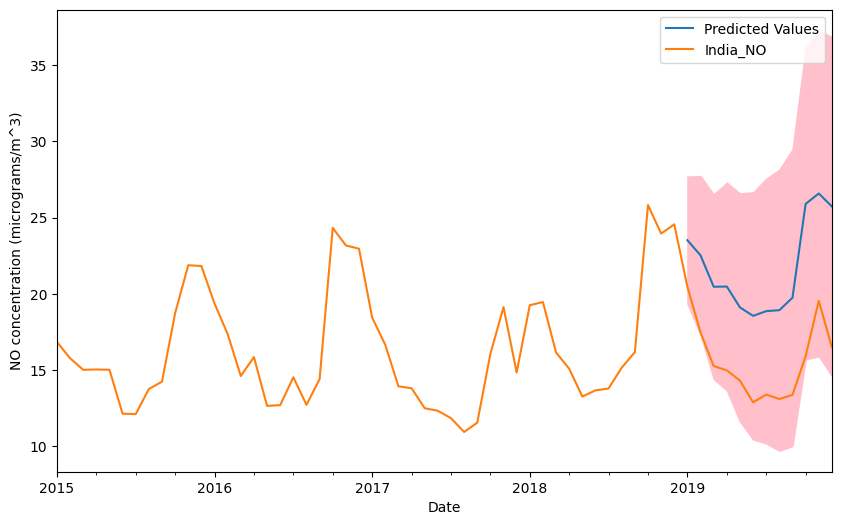

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

# predict the next 12 months values to compare with the test dataset
forecasts_NO = results_NO.get_forecast(steps=12, dynamic=True)

# find the confidence intervals
confidence_intervals_NO = forecasts_NO.conf_int()
lower_limits_NO = confidence_intervals_NO.loc[:,'lower India_NO']
upper_limits_NO = confidence_intervals_NO.loc[:,'upper India_NO']

# plot the forecasted mean data for the next 12 months and the confidence interval
forecasts_NO.predicted_mean.plot(legend=True, ax=ax, label='Predicted Values')
plt.fill_between(confidence_intervals_NO.index, lower_limits_NO, upper_limits_NO, color='pink')

# plotting the actual value from test data
test_data_NO.plot(legend=True, ax=ax)

# Add SI unit and scale to the y-axis
ax.set_ylabel('NO concentration (micrograms/m^3)')

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

test_NO = city_NO['India_NO']['2019-01':'2019-12']
RMSE_NO = np.sqrt(mean_squared_error(forecasts_NO.predicted_mean,test_NO))
print('NO_RMSE = ',RMSE_NO)

y_true_NO = test_NO
y_pre_NO = forecasts_NO.predicted_mean
mape_NO = np.mean(np.abs((y_true_NO - y_pre_NO) / y_true_NO)) * 100
print('NO_MAPE = ', mape_NO)

NO_RMSE =  6.367397255566454
NO_MAPE =  39.98691787950126


Text(0, 0.5, 'NO concentration (micrograms/m^3)')

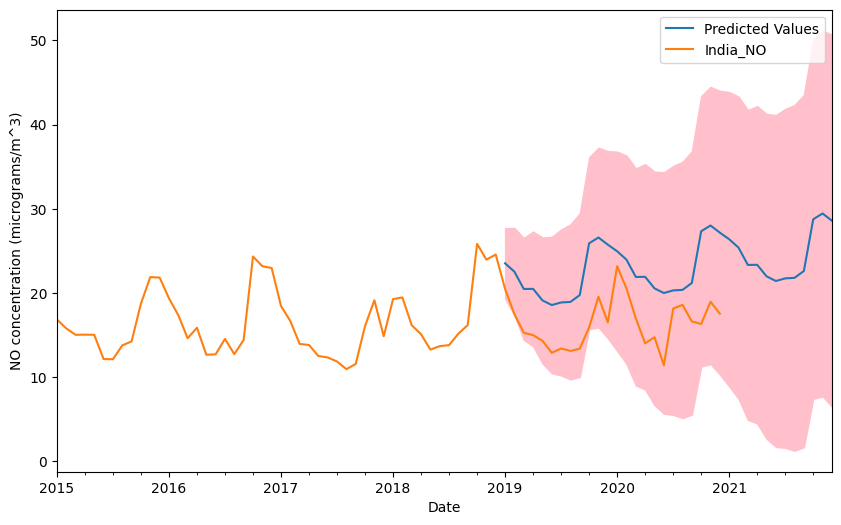

In [ ]:
fig, ax= plt.subplots(figsize=(10,6))

forecasts_NO = results_NO.get_forecast(steps=36, dynamic=True)

confidence_intervals_NO = forecasts_NO.conf_int()
lower_limits_NO = confidence_intervals_NO.loc[:,'lower India_NO']
upper_limits_NO = confidence_intervals_NO.loc[:,'upper India_NO']

#plot the forecasted data
forecasts_NO.predicted_mean.plot(legend=True, ax=ax, label ='Predicted Values')

#plot the confidence interval as the shaded area
plt.fill_between(confidence_intervals_NO.index, lower_limits_NO, upper_limits_NO, color='pink')

#Plot India's NO Data
city_NO['India_NO'].plot(legend=True, ax=ax)

ax.set_ylabel('NO concentration (micrograms/m^3)')

In [ ]:
auto_arima(y=city_CO['India_CO'],start_p=1,start_P=1,start_q=1,start_Q=1,seasonal=True,m=12, stepwise=True).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   72
Model:               SARIMAX(1, 1, 0)   Log Likelihood                 -57.161
Date:                Wed, 08 Nov 2023   AIC                            118.321
Time:                        06:30:44   BIC                            122.846
Sample:                    01-01-2015   HQIC                           120.121
                         - 12-01-2020                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3099      0.089     -3.488      0.000      -0.484      -0.136
sigma2         0.2925      0.043      6.813      0.000       0.208       0.377
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 8.42
Prob(Q):                              0.97   Prob(JB):                         0.01
Heteroskedasticity (H):               0.18   Skew:                             0.69
Prob(H) (two-sided):                  0.00   Kurtosis:                         3.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
#dividing into train and test:
train_data_CO =city_CO['India_CO'][:'2018-12']
test_data_CO =city_CO['India_CO'][:'2019-12']

from statsmodels.tsa.statespace.sarimax import SARIMAX

#Building the model:
model_CO=SARIMAX(train_data_CO,order=(0,1,2),seasonal_order=(1,0,1,12), trend='n')
results_CO=model_CO.fit()

#printing summry of model reults
results_CO.summary()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:1009: UserWarning: Non-invertible starting seasonal moving average Using zeros as starting parameters.
  warn('Non-invertible starting seasonal moving average'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                             India_CO   No. Observations:                   48
Model:             SARIMAX(0, 1, 2)x(1, 0, [1], 12)   Log Likelihood                 -43.396
Date:                              Wed, 08 Nov 2023   AIC                             96.792
Time:                                      06:30:46   BIC                            106.043
Sample:                                  01-01-2015   HQIC                           100.273
                                       - 12-01-2018                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.4646      0.160     -2.904      0.004      -0.778      -0.151
ma.L2          0.2272      0.152      1.494      0.135      -0.071       0.525
ar.S.L12      -0.6311      1.128     -0.560      0.576      -2.842       1.580
ma.S.L12       0.9952     41.385      0.024      0.981     -80.117      82.108
sigma2         0.3154     12.739      0.025      0.980     -24.652      25.283
===================================================================================
Ljung-Box (L1) (Q):                   0.16   Jarque-Bera (JB):                 2.88
Prob(Q):                              0.69   Prob(JB):                         0.24
Heteroskedasticity (H):               0.86   Skew:                             0.60
Prob(H) (two-sided):                  0.77   Kurtosis:                         3.17
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

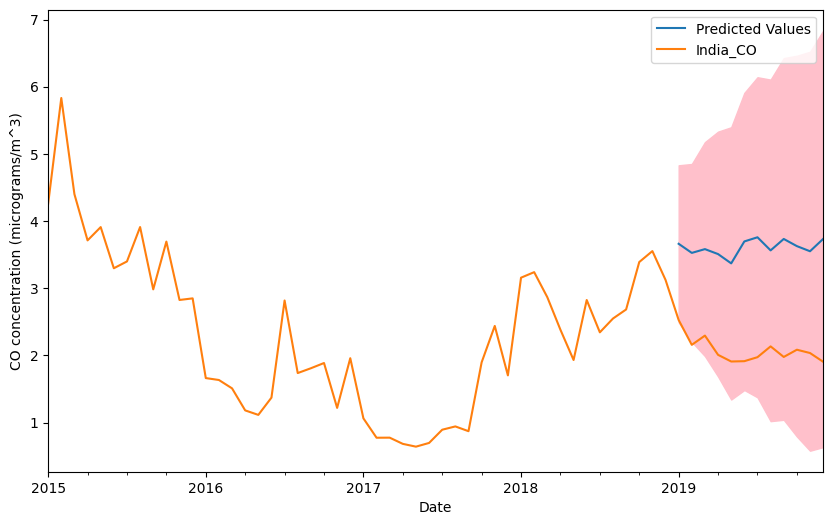

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,6))

# predict the next 12 months values to compare with the test dataset
forecasts_CO = results_CO.get_forecast(steps=12, dynamic=True)

# find the confidence intervals
confidence_intervals_CO = forecasts_CO.conf_int()
lower_limits_CO = confidence_intervals_CO.loc[:,'lower India_CO']
upper_limits_CO = confidence_intervals_CO.loc[:,'upper India_CO']

# plot the forecasted mean data for the next 12 months and the confidence interval
forecasts_CO.predicted_mean.plot(legend=True, ax=ax, label='Predicted Values')
plt.fill_between(confidence_intervals_CO.index, lower_limits_CO, upper_limits_CO, color='pink')

# plotting the actual value from test data
test_data_CO.plot(legend=True, ax=ax)

# Add SI unit and scale to the y-axis
ax.set_ylabel('CO concentration (micrograms/m^3)')

plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error

test_CO = city_CO['India_CO']['2019-01':'2019-12']
RMSE_CO = np.sqrt(mean_squared_error(forecasts_CO.predicted_mean,test_CO))
print('CO_RMSE = ',RMSE_CO)

y_true_CO = test_CO
y_pre_CO = forecasts_CO.predicted_mean
mape_CO = np.mean(np.abs((y_true_CO - y_pre_CO) / y_true_CO)) * 100
print('CO_MAPE = ', mape_CO)

CO_RMSE =  1.5463791300343652
CO_MAPE =  74.89044861326552


Text(0, 0.5, 'CO concentration (micrograms/m^3)')

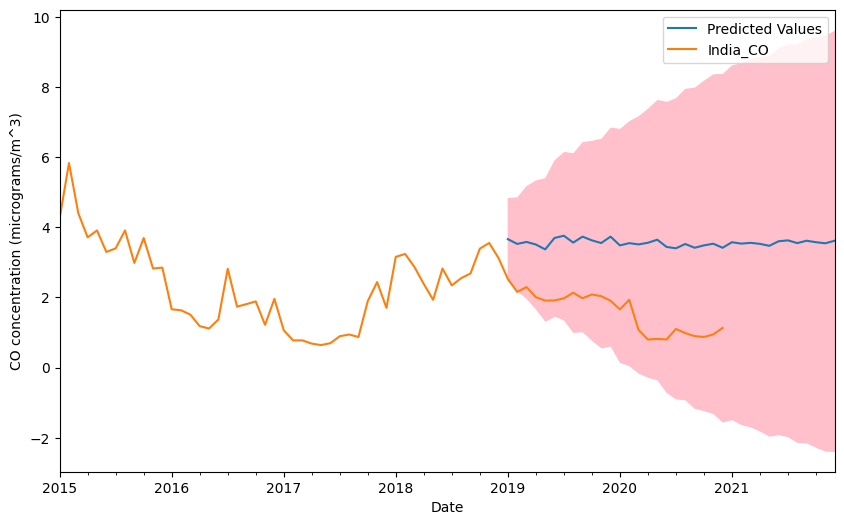

In [ ]:
fig, ax= plt.subplots(figsize=(10,6))

forecasts_CO = results_CO.get_forecast(steps=36, dynamic=True)

confidence_intervals_CO = forecasts_CO.conf_int()
lower_limits_CO = confidence_intervals_CO.loc[:,'lower India_CO']
upper_limits_CO = confidence_intervals_CO.loc[:,'upper India_CO']

#plot the forecasted data
forecasts_CO.predicted_mean.plot(legend=True, ax=ax, label ='Predicted Values')

#plot the confidence interval as the shaded area
plt.fill_between(confidence_intervals_CO.index, lower_limits_CO, upper_limits_CO, color='pink')

#Plot India's CO Data
city_CO['India_CO'].plot(legend=True, ax=ax)

ax.set_ylabel('CO concentration (micrograms/m^3)')

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

# Define the Adaptive KNN model
def adaptive_knn(train_data, test_data, k_value):
    predictions = []

    knn = KNeighborsRegressor(n_neighbors=k_value, weights='distance')

    for i in range(len(test_data)):
        train_index = train_data.index[-k_value:].to_julian_date().values.reshape(-1, 1)
        train_values = train_data[-k_value:]

        knn.fit(train_index, train_values)

        test_index = test_data.index[i].to_julian_date().reshape(-1, 1)
        prediction = knn.predict(test_index)
        predictions.append(prediction[0])

    return predictions

# Use a single k_value for Adaptive KNN
k_value = 5

# Get the predictions for Adaptive KNN
adaptive_knn_predictions = adaptive_knn(train_data, test_data, k_value)


NameError: ignored

In [ ]:
import xgboost as xgb

# Define the XGBoost model
def xgboost_model(train_data, test_data):
    xgb_reg = xgb.XGBRegressor(objective ='reg:squarederror', n_estimators = 100, learning_rate = 0.1)
    xgb_reg.fit(train_data.index.to_julian_date().values.reshape(-1, 1), train_data)
    predictions = xgb_reg.predict(test_data.index.to_julian_date().values.reshape(-1, 1))
    return predictions

# Get the predictions for XGBoost
xgboost_predictions = xgboost_model(train_data, test_data)

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Assuming test_data contains actual target values
# Calculate Mean Absolute Error (MAE) for Adaptive KNN
mae_adaptive_knn = mean_absolute_error(test_data, adaptive_knn_predictions)

# Calculate Mean Squared Error (MSE) for Adaptive KNN
mse_adaptive_knn = mean_squared_error(test_data, adaptive_knn_predictions)

# Calculate R-squared (R2) for Adaptive KNN
r2_adaptive_knn = r2_score(test_data, adaptive_knn_predictions)

print(f'Mean Absolute Error (Adaptive KNN): {mae_adaptive_knn:.4f}')

print(f'Mean Squared Error (Adaptive KNN): {mse_adaptive_knn:.4f}')

print(f'R-squared (Adaptive KNN): {r2_adaptive_knn:.4f}')

In [ ]:
# Calculate Mean Absolute Error (MAE) for XGBoost
mae_xgboost = mean_absolute_error(test_data, xgboost_predictions)

# Calculate Mean Squared Error (MSE) for XGBoost
mse_xgboost = mean_squared_error(test_data, xgboost_predictions)

# Calculate R-squared (R2) for XGBoost
r2_xgboost = r2_score(test_data, xgboost_predictions)

print(f'Mean Absolute Error (XGBoost): {mae_xgboost:.4f}')

print(f'Mean Squared Error (XGBoost): {mse_xgboost:.4f}')

print(f'R-squared (XGBoost): {r2_xgboost:.4f}')

In [ ]:
# Calculate RMSE and MAPE for all models
from sklearn.metrics import mean_squared_error

# Adaptive KNN RMSE and MAPE
adaptive_knn_rmse = np.sqrt(mean_squared_error(adaptive_knn_predictions, test_data))
adaptive_knn_mape = np.mean(np.abs((test_data - adaptive_knn_predictions) / test_data)) * 100

# Print the results
print("Adaptive KNN Model - RMSE: {:.2f}%".format(adaptive_knn_rmse))

print("Adaptive KNN Model - MAPE: {:.2f}%".format(adaptive_knn_mape))

In [ ]:
# XGBoost RMSE and MAPE
xgboost_rmse = np.sqrt(mean_squared_error(xgboost_predictions, test_data))
xgboost_mape = np.mean(np.abs((test_data - xgboost_predictions) / test_data)) * 100

# Print the Results
print("XGBoost Model - RMSE: {:.2f}%".format(xgboost_rmse))

print("XGBoost Model - MAPE: {:.2f}%".format(xgboost_mape))